In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dn_ds_ena_v15.csv')
data.head()

,id,month,gene_name,country,source,dn,ds
0,1,2021-04-01,ORF10,United States,ENA,8,4
1,2,2021-03-01,ORF7b,Poland,ENA,0,7
2,3,2021-05-01,ORF8,Philippines,ENA,7,8
3,4,2021-05-01,ORF1ab,South Africa,ENA,3,3
4,5,2021-02-01,ORF3a,Brazil,ENA,68,29


In [3]:
data["dn_ds"] = data.dn / data.ds

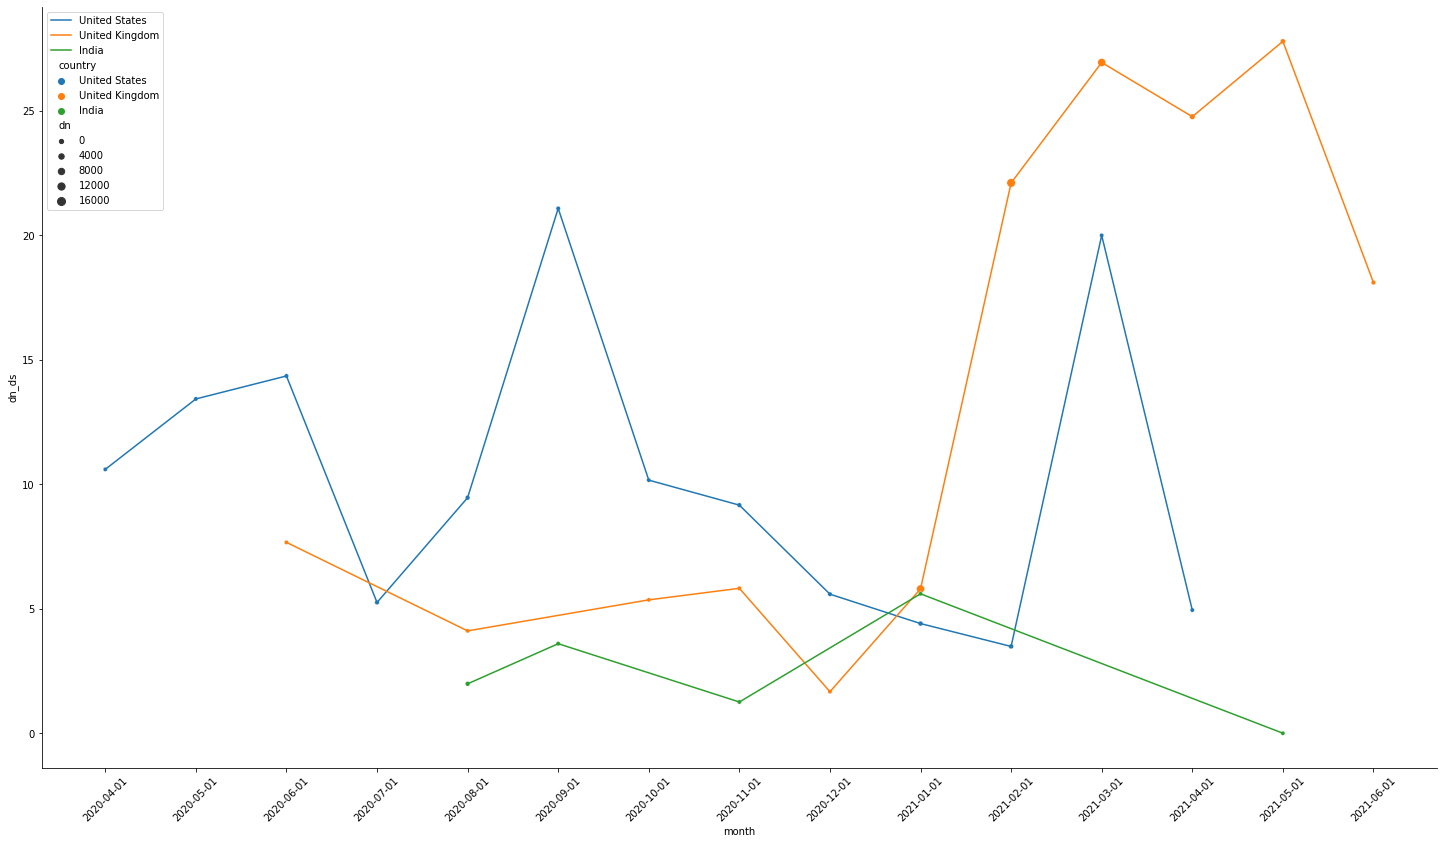

In [19]:
plt.figure(figsize=(25, 14))
sns.lineplot(data=data[(data.gene_name == "S") & (data.country.isin(["United Kingdom", "United States", "India"]))].sort_values("month"), 
             x="month", y="dn_ds", hue="country")
sns.scatterplot(data=data[(data.gene_name == "S") & (data.country.isin(["United Kingdom", "United States", "India"]))].sort_values("month"), 
             x="month", y="dn_ds", hue="country", size="dn")
plt.xticks(rotation=45)
sns.despine()

In [10]:
data[data.country == "Israel"]

,id,month,gene_name,country,source,dn,ds,dn_ds
107,108,2020-10-01,S,Israel,ENA,2,1,2.00
243,244,2020-05-01,N,Israel,ENA,2,1,2.00
426,427,2020-10-01,ORF1ab,Israel,ENA,2,8,0.25
469,470,2020-05-01,ORF1ab,Israel,ENA,0,3,0.00
746,747,2020-10-01,M,Israel,ENA,2,0,inf
758,759,2020-10-01,N,Israel,ENA,4,0,inf
797,798,2020-05-01,S,Israel,ENA,1,0,inf
808,809,2020-10-01,ORF8,Israel,ENA,1,0,inf
816,817,2020-10-01,ORF3a,Israel,ENA,3,0,inf


In [29]:
data_all_countries = data[["month", "gene_name", "dn", "ds"]].groupby(["month", "gene_name"]).sum().reset_index()
data_all_countries.head()

,month,gene_name,dn,ds
0,2020-02-01,E,0,1
1,2020-02-01,N,4,1
2,2020-02-01,ORF1ab,22,2
3,2020-02-01,ORF3a,1,0
4,2020-02-01,S,2,1


In [30]:
data_all_countries["dn_ds"] = data_all_countries.dn / data_all_countries.ds

In [31]:
data_all_countries

,month,gene_name,dn,ds,dn_ds
0,2020-02-01,E,0,1,0.000000
1,2020-02-01,N,4,1,4.000000
2,2020-02-01,ORF1ab,22,2,11.000000
3,2020-02-01,ORF3a,1,0,inf
4,2020-02-01,S,2,1,2.000000
...,...,...,...,...,...
167,2021-06-01,ORF6,56,44,1.272727
168,2021-06-01,ORF7a,561,77,7.285714
169,2021-06-01,ORF7b,135,43,3.139535
170,2021-06-01,ORF8,3643,374,9.740642


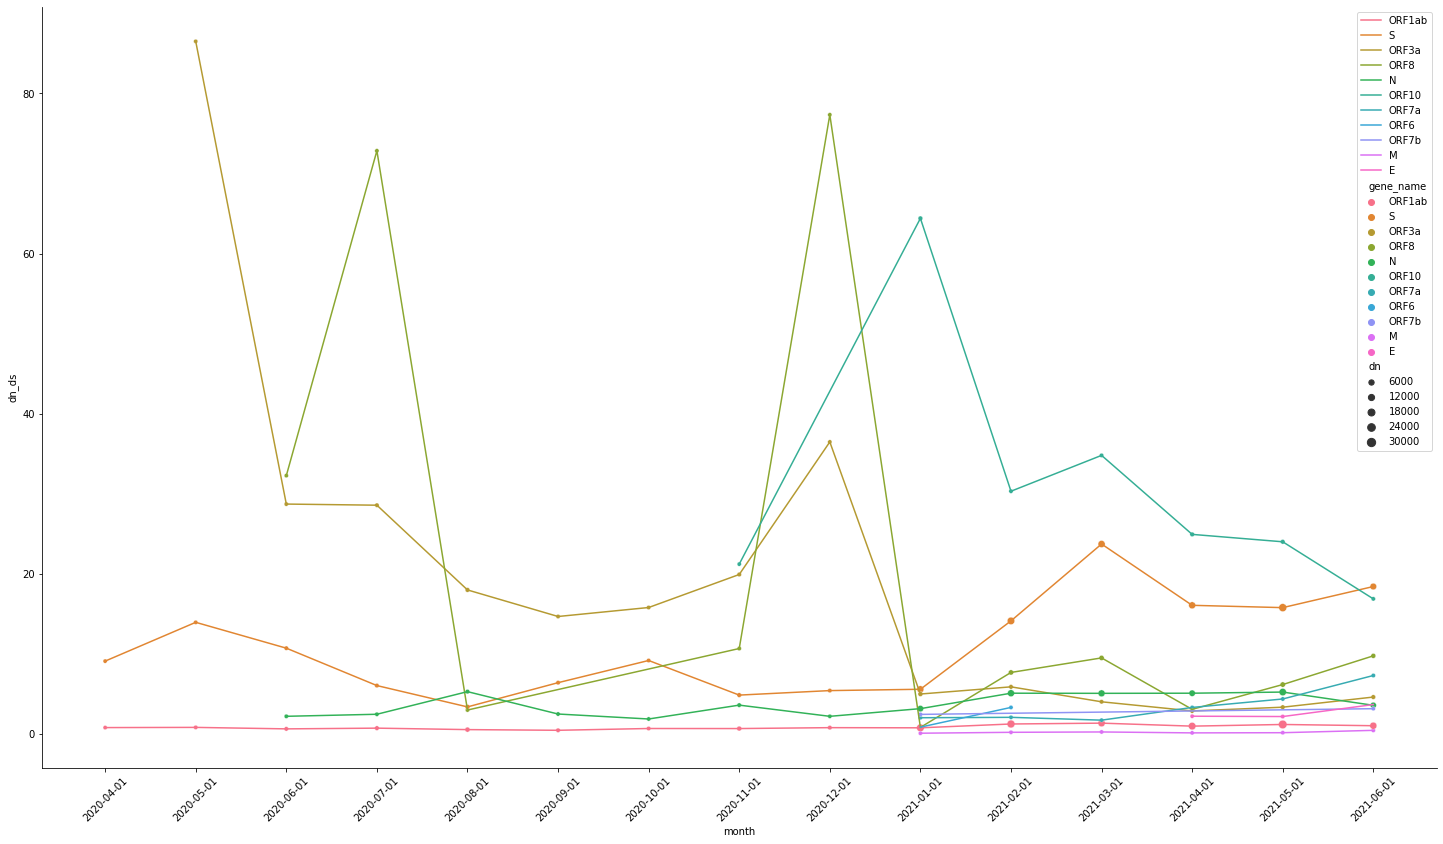

In [32]:
plt.figure(figsize=(25, 14))
sns.lineplot(data=data_all_countries[data_all_countries.dn > 100].sort_values("month"), x="month", y="dn_ds", hue="gene_name")
sns.scatterplot(data=data_all_countries[data_all_countries.dn > 100].sort_values("month"), x="month", y="dn_ds", hue="gene_name", size="dn")
plt.xticks(rotation=45)
sns.despine()

In [34]:
data_all_genes = data_all_countries[["gene_name", "dn", "ds"]].groupby("gene_name").sum().reset_index()
data_all_genes["dn_ds"] = data_all_genes.dn / data_all_genes.ds
data_all_genes.sort_values("dn_ds")

,gene_name,dn,ds,dn_ds
1,M,1802,12845,0.140288
4,ORF1ab,156826,160743,0.975632
6,ORF6,785,657,1.194825
0,E,866,652,1.328221
8,ORF7b,966,441,2.190476
7,ORF7a,2491,859,2.899884
2,N,98546,22508,4.378266
9,ORF8,27310,6171,4.425539
5,ORF3a,18605,3226,5.767204
10,S,127523,11136,11.451419


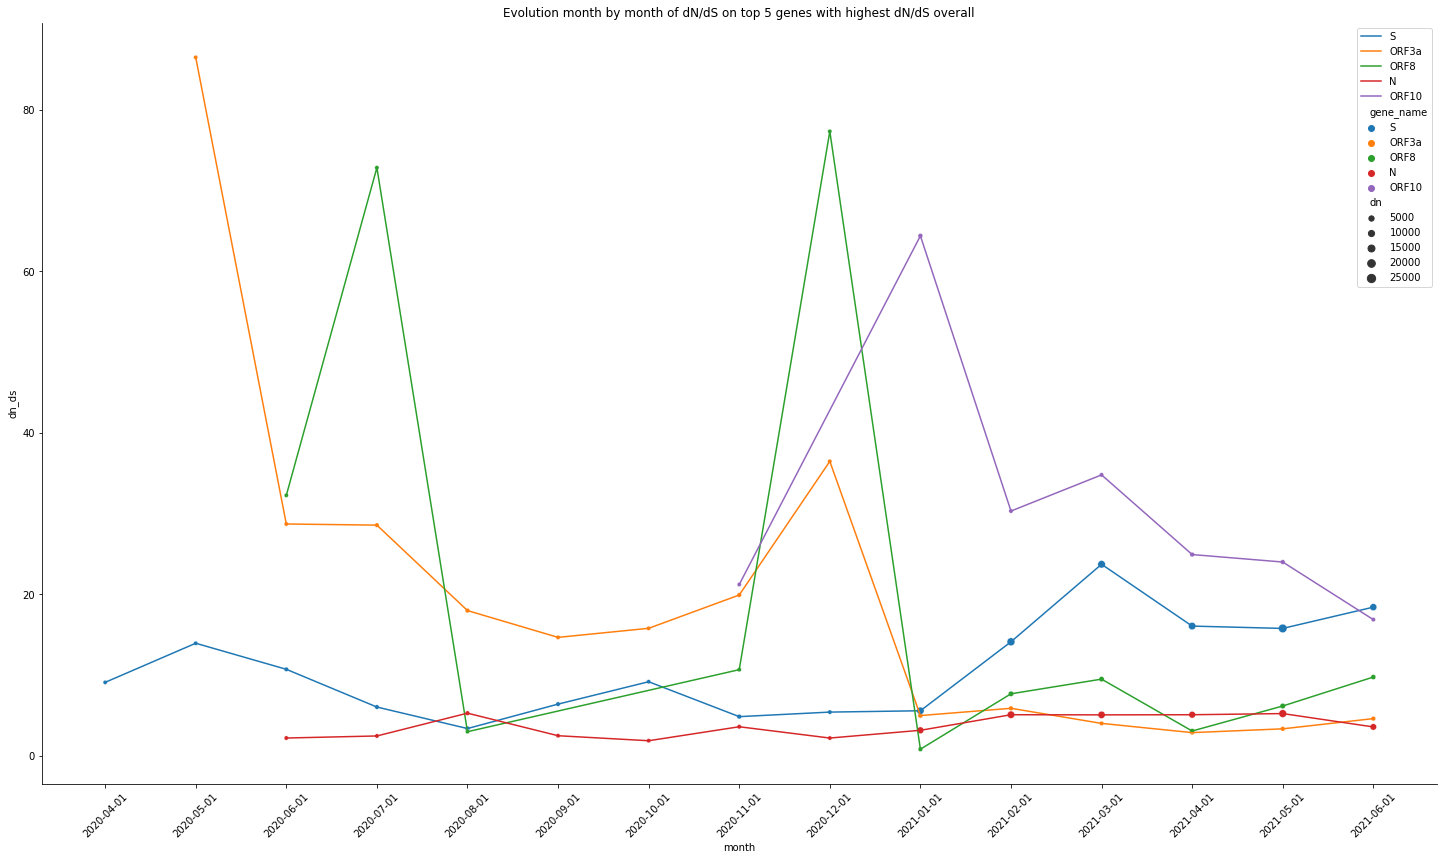

In [35]:
plt.figure(figsize=(25, 14))
data_top_5_genes = data_all_countries[(data_all_countries.dn > 100) & (data_all_countries.gene_name.isin(["ORF10", "S", "ORF3a", "ORF8", "N"]))].sort_values("month")
sns.lineplot(data=data_top_5_genes, x="month", y="dn_ds", hue="gene_name")
sns.scatterplot(data=data_top_5_genes, x="month", y="dn_ds", hue="gene_name", size="dn")
plt.xticks(rotation=45)
plt.title("Evolution month by month of dN/dS on top 5 genes with highest dN/dS overall")
sns.despine()

In [ ]:
plt.figure(figsize=(25, 14))
data_top_5_genes = data_all_countries[(data_all_countries.dn > 100) & (data_all_countries.gene_name.isin(["ORF10", "S", "ORF3a", "ORF8", "N"]))].sort_values("month")
sns.lineplot(data=data_top_5_genes, x="month", y="dn_ds", hue="gene_name")
sns.scatterplot(data=data_top_5_genes, x="month", y="dn_ds", hue="gene_name", size="dn")
plt.xticks(rotation=45)
plt.title("Evolution month by month of dN/dS on top 5 genes with highest dN/dS overall (only UK)")
sns.despine()